# Introduction

This project focuses on leveraging machine learning to predict credit card eligibility. By analyzing a diverse dataset encompassing demographic, financial, and behavioral attributes, we aim to develop models that accurately classify individuals as high or low risk. Through this analysis, we aim to provide valuable insights for financial institutions to optimize credit risk assessment processes and facilitate responsible lending practices.

# Data Dictionary

* **ID:** Unique identifier for each individual.
* **Gender:** Gender of the individual (e.g., Male, Female).
* **Has a car:** Whether the individual owns a car (Yes/No).
* **Has a property:** Whether the individual owns property (Yes/No).
* **Children count:** Number of children the individual has.
* **Income:** Income of the individual.
* **Employment status:** Current employment status of the individual.
* **Education level:** Highest level of education attained by the individual.
* **Marital status:** Marital status of the individual.
* **Dwelling:** Type of dwelling the individual resides in.
* **Age:** Age of the individual.
* **Employment length:** Length of time the individual has been employed.
* **Has a mobile phone:** Whether the individual has a mobile phone (Yes/No).
* **Has a work phone:** Whether the individual has a work phone (Yes/No).
* **Has a phone:** Whether the individual has a phone (Yes/No).
* **Has an email:** Whether the individual has an email (Yes/No).
* **Job title:** Title of the individual's job.
* **Family member count:** Number of family members the individual has.
* **Account age:** Age of the individual's account.
* **Is high risk:** Target variable indicating whether the individual is considered high risk for credit card eligibility (0/1).

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import seaborn as sns
import plotly.figure_factory as ff

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")

# Loading Training & Testing Datasets

In [2]:
train = pd.read_csv('/kaggle/input/car-price-prediction-dataset/train_data.csv')
test = pd.read_csv('/kaggle/input/car-price-prediction-dataset/test_data.csv')

Merging the datasets for easier computation

In [3]:
card = pd.concat([train, test], ignore_index=True)

# Data Exploration

In [4]:
card.head()

ID Gender Has a car Has a property  Children count    Income  \
0  5037048      M         Y              Y               0  135000.0   
1  5044630      F         Y              N               1  135000.0   
2  5079079      F         N              Y               2  180000.0   
3  5112872      F         Y              Y               0  360000.0   
4  5105858      F         N              N               0  270000.0   

      Employment status                Education level        Marital status  \
0               Working  Secondary / secondary special               Married   
1  Commercial associate               Higher education  Single / not married   
2  Commercial associate  Secondary / secondary special               Married   
3  Commercial associate               Higher education  Single / not married   
4               Working  Secondary / secondary special             Separated   

            Dwelling    Age  Employment length  Has a mobile phone  \
0       With parents -16271              -3111                   1   
1  House / apartment -10130              -1651                   1   
2  House / apartment -12821              -5657                   1   
3  House / apartment -20929              -2046                   1   
4  House / apartment -16207               -515                   1   

   Has a work phone  Has a phone  Has an email    Job title  \
0                 0            0             0   Core staff   
1                 0            0             0  Accountants   
2                 0            0             0     Laborers   
3                 0            0             1     Managers   
4                 0            1             0          NaN   

   Family member count  Account age  Is high risk  
0                  2.0        -17.0             0  
1                  2.0         -1.0             0  
2                  4.0        -38.0             0  
3                  1.0        -11.0             0  
4                  1.0        -41.0             0

In [5]:
card.tail()

ID Gender Has a car Has a property  Children count    Income  \
36452  5115415      F         Y              Y               0  135000.0   
36453  5068826      F         Y              Y               0  157500.0   
36454  5026088      F         N              Y               0   67500.0   
36455  5142701      F         Y              N               0   95850.0   
36456  5022903      F         N              Y               1  135000.0   

          Employment status                Education level  Marital status  \
36452               Working  Secondary / secondary special         Married   
36453               Working               Higher education         Married   
36454               Working  Secondary / secondary special           Widow   
36455  Commercial associate  Secondary / secondary special         Married   
36456  Commercial associate  Secondary / secondary special  Civil marriage   

                Dwelling    Age  Employment length  Has a mobile phone  \
36452  House / apartment -21724              -1351                   1   
36453  House / apartment -14976              -3550                   1   
36454  House / apartment -20482              -5030                   1   
36455  House / apartment -18931              -6678                   1   
36456  House / apartment -10765              -2196                   1   

       Has a work phone  Has a phone  Has an email Job title  \
36452                 0            0             0       NaN   
36453                 0            0             1   Drivers   
36454                 1            1             0       NaN   
36455                 1            0             0  Laborers   
36456                 0            0             1       NaN   

       Family member count  Account age  Is high risk  
36452                  2.0        -22.0             0  
36453                  2.0        -42.0             0  
36454                  1.0        -25.0             0  
36455                  2.0        -49.0             0  
36456                  3.0        -36.0             0

In [6]:
card.shape

(36457, 20)

In [7]:
card.describe()

ID  Children count        Income           Age  \
count  3.645700e+04    36457.000000  3.645700e+04  36457.000000   
mean   5.078227e+06        0.430315  1.866857e+05 -15975.173382   
std    4.187524e+04        0.742367  1.017892e+05   4200.549944   
min    5.008804e+06        0.000000  2.700000e+04 -25152.000000   
25%    5.042028e+06        0.000000  1.215000e+05 -19438.000000   
50%    5.074614e+06        0.000000  1.575000e+05 -15563.000000   
75%    5.115396e+06        1.000000  2.250000e+05 -12462.000000   
max    5.150487e+06       19.000000  1.575000e+06  -7489.000000   

       Employment length  Has a mobile phone  Has a work phone   Has a phone  \
count       36457.000000             36457.0      36457.000000  36457.000000   
mean        59262.935568                 1.0          0.225526      0.294813   
std        137651.334859                 0.0          0.417934      0.455965   
min        -15713.000000                 1.0          0.000000      0.000000   
25%         -3153.000000                 1.0          0.000000      0.000000   
50%         -1552.000000                 1.0          0.000000      0.000000   
75%          -408.000000                 1.0          0.000000      1.000000   
max        365243.000000                 1.0          1.000000      1.000000   

       Has an email  Family member count   Account age  Is high risk  
count  36457.000000         36457.000000  36457.000000  36457.000000  
mean       0.089722             2.198453    -26.164193      0.016897  
std        0.285787             0.911686     16.501854      0.128886  
min        0.000000             1.000000    -60.000000      0.000000  
25%        0.000000             2.000000    -39.000000      0.000000  
50%        0.000000             2.000000    -24.000000      0.000000  
75%        0.000000             3.000000    -12.000000      0.000000  
max        1.000000            20.000000      0.000000      1.000000

In [8]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   Gender               36457 non-null  object 
 2   Has a car            36457 non-null  object 
 3   Has a property       36457 non-null  object 
 4   Children count       36457 non-null  int64  
 5   Income               36457 non-null  float64
 6   Employment status    36457 non-null  object 
 7   Education level      36457 non-null  object 
 8   Marital status       36457 non-null  object 
 9   Dwelling             36457 non-null  object 
 10  Age                  36457 non-null  int64  
 11  Employment length    36457 non-null  int64  
 12  Has a mobile phone   36457 non-null  int64  
 13  Has a work phone     36457 non-null  int64  
 14  Has a phone          36457 non-null  int64  
 15  Has an email         36457 non-null 

In [9]:
card.isnull().sum()

ID                         0
Gender                     0
Has a car                  0
Has a property             0
Children count             0
Income                     0
Employment status          0
Education level            0
Marital status             0
Dwelling                   0
Age                        0
Employment length          0
Has a mobile phone         0
Has a work phone           0
Has a phone                0
Has an email               0
Job title              11323
Family member count        0
Account age                0
Is high risk               0
dtype: int64

There are 11323 null values in the 'Job title' column of the dataset.

In [10]:
card['Job title'].unique()

array(['Core staff', 'Accountants', 'Laborers', 'Managers', nan,
       'Sales staff', 'Medicine staff', 'High skill tech staff',
       'HR staff', 'Low-skill Laborers', 'Drivers', 'Secretaries',
       'Cleaning staff', 'Cooking staff', 'Security staff',
       'Private service staff', 'IT staff', 'Waiters/barmen staff',
       'Realty agents'], dtype=object)

As the 'Job title' column has many nan values, hence we drop the column.

In [11]:
card = card.drop(columns=['Job title'])

# Data Visualization

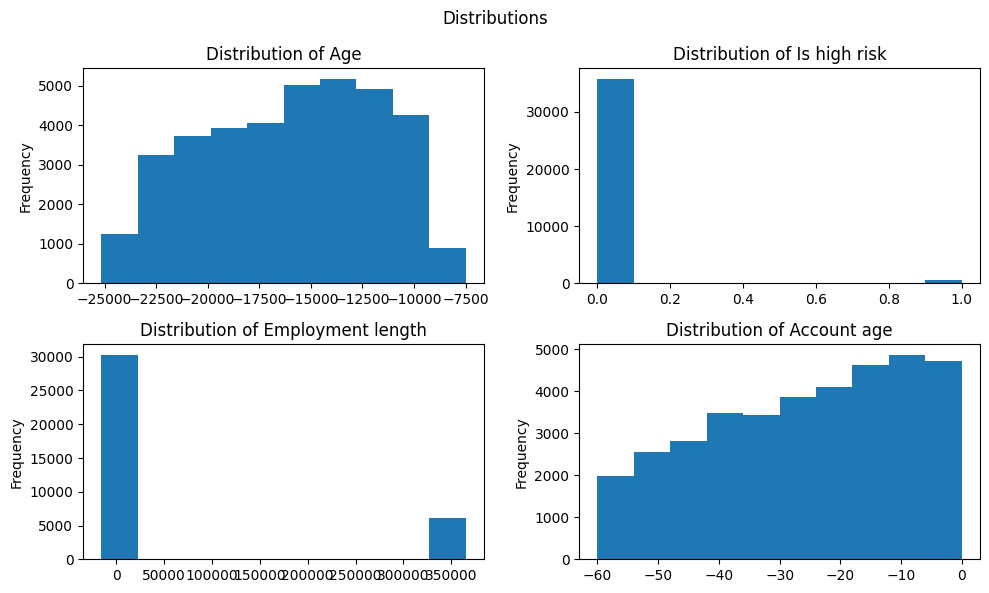

In [12]:
paper, axes = plt.subplots(2, 2, figsize=(10,6))
card['Age'].plot(kind='hist', ax = axes[0,0], title = 'Distribution of Age')
card['Is high risk'].plot(kind='hist', ax = axes[0,1], title = 'Distribution of Is high risk')

card['Employment length'].plot(kind='hist', ax = axes[1,0], title = 'Distribution of Employment length')
card['Account age'].plot(kind='hist', ax = axes[1,1], title = 'Distribution of Account age')
plt.suptitle('Distributions')
plt.tight_layout()

**DataTypes**

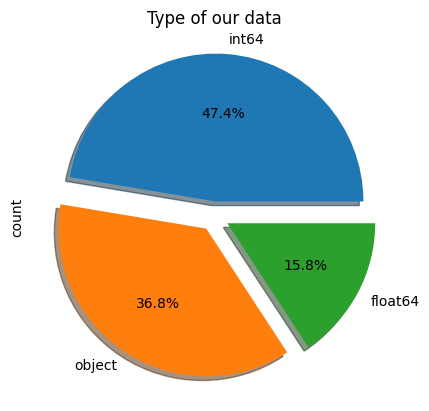

In [13]:
card.dtypes.value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('Type of our data');

**Income Distribution by Gender**

In [14]:
fig = px.box(card, x='Gender', y='Income', title='Income Distribution by Gender')
fig.update_layout(xaxis_title='Gender', yaxis_title='Income',width=600,  
        height=500)
fig.show()

**Employment Status Distribution**

In [15]:
fig = px.pie(card['Employment status'].value_counts(), 
              names=card['Employment status'].value_counts().index, 
              title='Distribution of Employment Status')
fig.show()

**Income Distribution by Education Level**

In [16]:
fig = px.violin(card, x='Education level', y='Income', title='Income Distribution by Education Level', color_discrete_sequence=['#FFD700'])
fig.update_layout(xaxis_title='Education Level', yaxis_title='Income',width=600,height=500)
fig.show()

**Age Distribution by Marital Status**

In [17]:
fig = px.box(card, x='Marital status', y='Age', title='Age Distribution by Marital Status', color_discrete_sequence=['lightgreen'])
fig.update_layout(xaxis_title='Marital Status', yaxis_title='Age', width=600, height=500)
fig.show()

**Account Age Distribution**

In [18]:
fig = px.histogram(card, x='Account age', title='Distribution of Account Ages',color_discrete_sequence=['#FFCCCB'])
fig.update_layout(xaxis_title='Account Age (months)', yaxis_title='Frequency', width=600, height=500)
fig.show()

**Pairplot of Select Features**

In [19]:
fig = px.scatter_matrix(card[['Income', 'Age', 'Account age', 'Is high risk']], 
                          dimensions=['Income', 'Age', 'Account age'], 
                          color='Is high risk')
fig.update_layout(title='Pairplot of Select Features', width=800,  height=700)
fig.show()

In [20]:
label_encoder = LabelEncoder()

# columns to encode
columns_to_encode = ['Gender', 'Has a car', 'Has a property', 'Employment status', 
                     'Education level', 'Marital status', 'Dwelling', 'Family member count']

# Encode each column
for column in columns_to_encode:
    card[column] = label_encoder.fit_transform(card[column])

print(card.head())

        ID  Gender  Has a car  Has a property  Children count    Income  \
0  5037048       1          1               1               0  135000.0   
1  5044630       0          1               0               1  135000.0   
2  5079079       0          0               1               2  180000.0   
3  5112872       0          1               1               0  360000.0   
4  5105858       0          0               0               0  270000.0   

   Employment status  Education level  Marital status  Dwelling    Age  \
0                  4                4               1         5 -16271   
1                  0                1               3         1 -10130   
2                  0                4               1         1 -12821   
3                  0                1               3         1 -20929   
4                  4                4               2         1 -16207   

   Employment length  Has a mobile phone  Has a work phone  Has a phone  \
0              -3111         

In [21]:
card.tail()

ID  Gender  Has a car  Has a property  Children count    Income  \
36452  5115415       0          1               1               0  135000.0   
36453  5068826       0          1               1               0  157500.0   
36454  5026088       0          0               1               0   67500.0   
36455  5142701       0          1               0               0   95850.0   
36456  5022903       0          0               1               1  135000.0   

       Employment status  Education level  Marital status  Dwelling    Age  \
36452                  4                4               1         1 -21724   
36453                  4                1               1         1 -14976   
36454                  4                4               4         1 -20482   
36455                  0                4               1         1 -18931   
36456                  0                4               0         1 -10765   

       Employment length  Has a mobile phone  Has a work phone  Has a phone  \
36452              -1351                   1                 0            0   
36453              -3550                   1                 0            0   
36454              -5030                   1                 1            1   
36455              -6678                   1                 1            0   
36456              -2196                   1                 0            0   

       Has an email  Family member count  Account age  Is high risk  
36452             0                    1        -22.0             0  
36453             1                    1        -42.0             0  
36454             0                    0        -25.0             0  
36455             0                    1        -49.0             0  
36456             1                    2        -36.0             0

<function matplotlib.pyplot.show(close=None, block=None)>

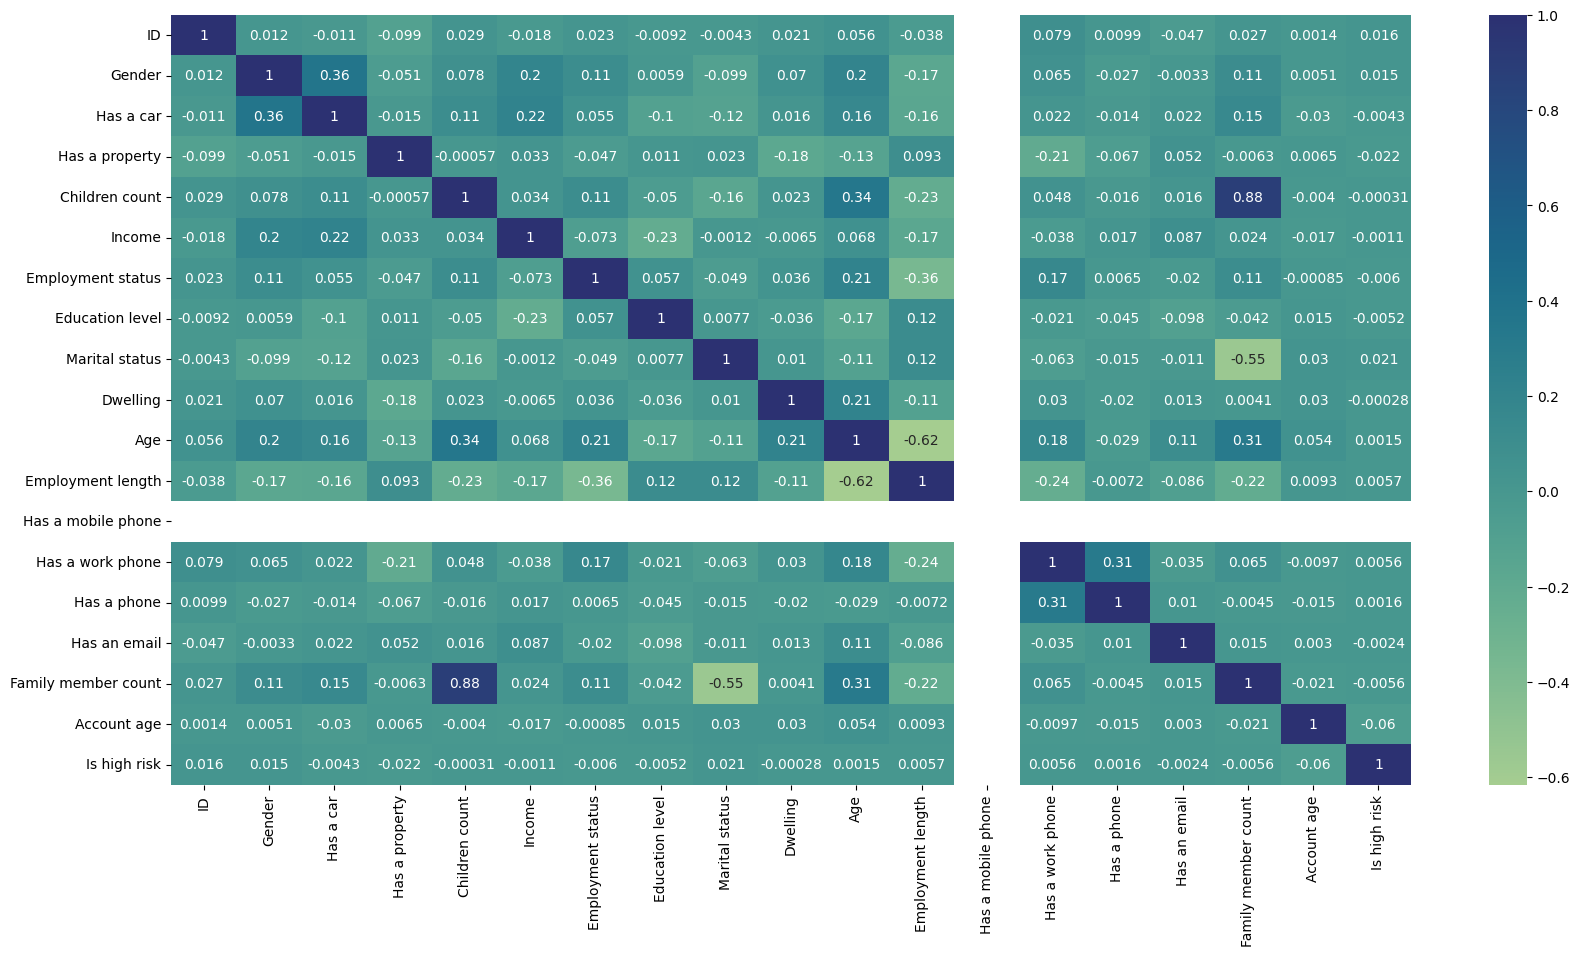

In [22]:
plt.figure(figsize = (20,10))
sns.heatmap(card.corr(), cmap = 'crest', annot = True)
plt.show

We can observe that 'Has a mobile phone' column is not correlatd to any other columns. Hence we drop that column. Moreover, the columns which are highly correlatd, we will drop one of those two.

In [23]:
card = card.drop(columns=['ID'])
card = card.drop(columns=['Has a mobile phone'])
card = card.drop(columns=['Children count'])
card = card.drop(columns=['Age'])
card = card.drop(columns=['Family member count'])

After droppings the columns which are highly correlated, we check the heatmap once again.

<function matplotlib.pyplot.show(close=None, block=None)>

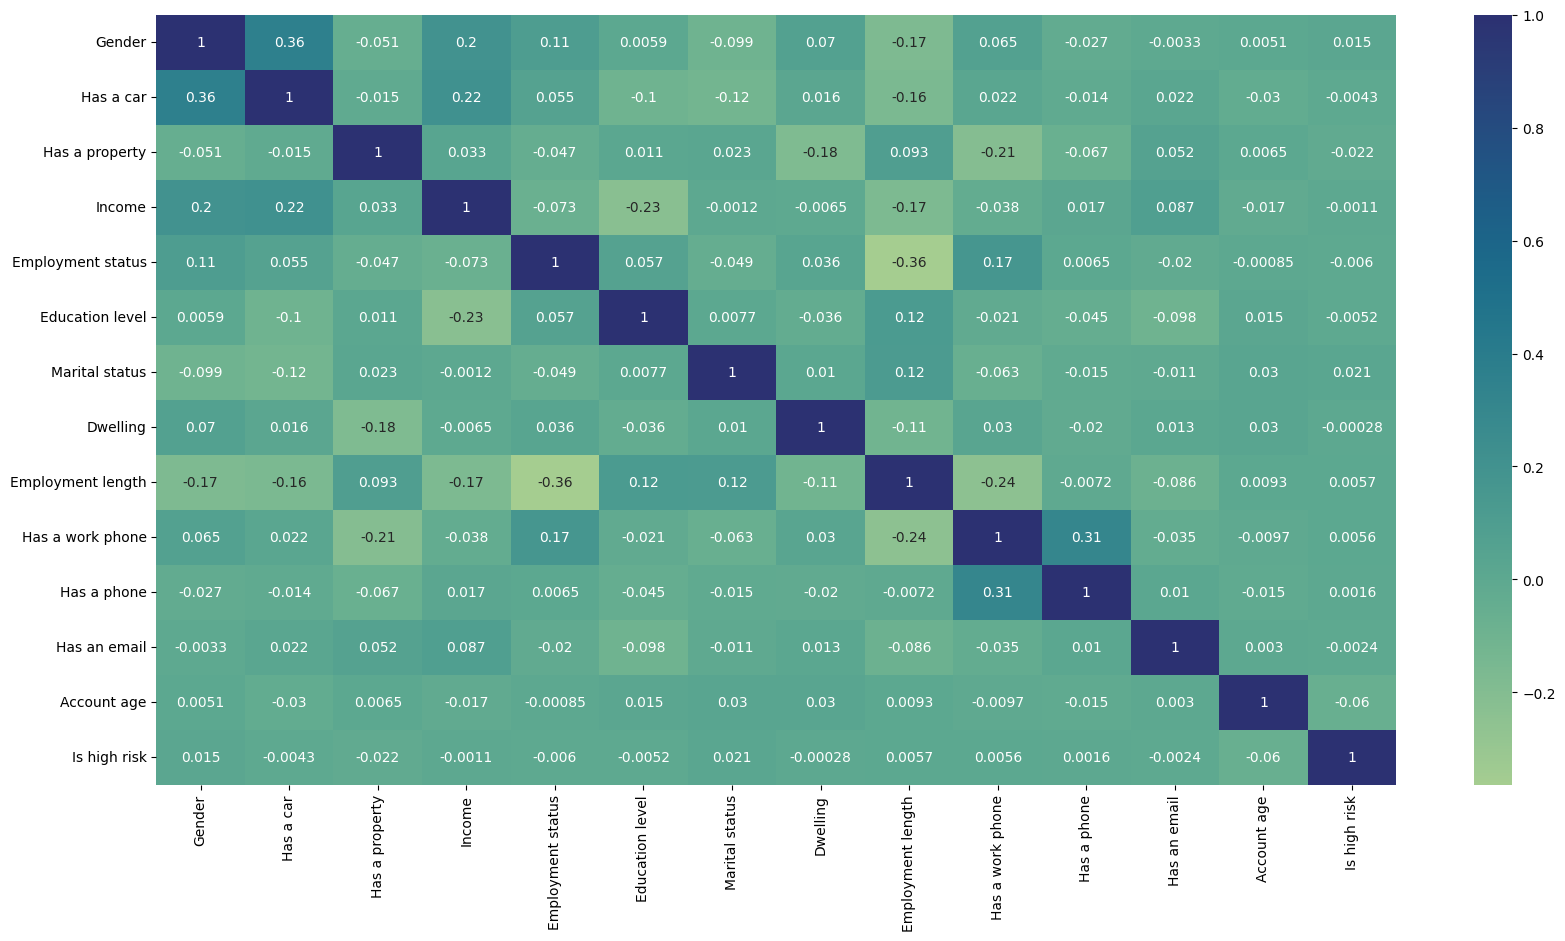

In [24]:
plt.figure(figsize = (20,10))
sns.heatmap(card.corr(), cmap = 'crest', annot = True)
plt.show

In [25]:
card


Gender  Has a car  Has a property    Income  Employment status  \
0           1          1               1  135000.0                  4   
1           0          1               0  135000.0                  0   
2           0          0               1  180000.0                  0   
3           0          1               1  360000.0                  0   
4           0          0               0  270000.0                  4   
...       ...        ...             ...       ...                ...   
36452       0          1               1  135000.0                  4   
36453       0          1               1  157500.0                  4   
36454       0          0               1   67500.0                  4   
36455       0          1               0   95850.0                  0   
36456       0          0               1  135000.0                  0   

       Education level  Marital status  Dwelling  Employment length  \
0                    4               1         5              -3111   
1                    1               3         1              -1651   
2                    4               1         1              -5657   
3                    1               3         1              -2046   
4                    4               2         1               -515   
...                ...             ...       ...                ...   
36452                4               1         1              -1351   
36453                1               1         1              -3550   
36454                4               4         1              -5030   
36455                4               1         1              -6678   
36456                4               0         1              -2196   

       Has a work phone  Has a phone  Has an email  Account age  Is high risk  
0                     0            0             0        -17.0             0  
1                     0            0             0         -1.0             0  
2                     0            0             0        -38.0             0  
3                     0            0             1        -11.0             0  
4                     0            1             0        -41.0             0  
...                 ...          ...           ...          ...           ...  
36452                 0            0             0        -22.0             0  
36453                 0            0             1        -42.0             0  
36454                 1            1             0        -25.0             0  
36455                 1            0             0        -49.0             0  
36456                 0            0             1        -36.0             0  

[36457 rows x 14 columns]

# Importing Packages & Modules

In [26]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier


# Data Preparation

In [27]:
# defining the features and target
X = card.drop(['Is high risk'],axis=1)
y = card[['Is high risk']]

In [28]:
X

Gender  Has a car  Has a property    Income  Employment status  \
0           1          1               1  135000.0                  4   
1           0          1               0  135000.0                  0   
2           0          0               1  180000.0                  0   
3           0          1               1  360000.0                  0   
4           0          0               0  270000.0                  4   
...       ...        ...             ...       ...                ...   
36452       0          1               1  135000.0                  4   
36453       0          1               1  157500.0                  4   
36454       0          0               1   67500.0                  4   
36455       0          1               0   95850.0                  0   
36456       0          0               1  135000.0                  0   

       Education level  Marital status  Dwelling  Employment length  \
0                    4               1         5              -3111   
1                    1               3         1              -1651   
2                    4               1         1              -5657   
3                    1               3         1              -2046   
4                    4               2         1               -515   
...                ...             ...       ...                ...   
36452                4               1         1              -1351   
36453                1               1         1              -3550   
36454                4               4         1              -5030   
36455                4               1         1              -6678   
36456                4               0         1              -2196   

       Has a work phone  Has a phone  Has an email  Account age  
0                     0            0             0        -17.0  
1                     0            0             0         -1.0  
2                     0            0             0        -38.0  
3                     0            0             1        -11.0  
4                     0            1             0        -41.0  
...                 ...          ...           ...          ...  
36452                 0            0             0        -22.0  
36453                 0            0             1        -42.0  
36454                 1            1             0        -25.0  
36455                 1            0             0        -49.0  
36456                 0            0             1        -36.0  

[36457 rows x 13 columns]

In [29]:
y['Is high risk'].value_counts()

Is high risk
0    35841
1      616
Name: count, dtype: int64

In [30]:
fig1 = px.histogram(card, x='Is high risk', title='Distribution of High Risk Individuals')
fig1.update_layout(xaxis_title='Is High Risk', yaxis_title='Count', width=600, height=500)
fig1.show()

In this case, there is a class imbalance, as the number of instances labeled as 0 (not high risk) significantly outweighs the number of instances labeled as 1 (high risk). 

Now, we use the the **Synthetic Minority Over-sampling Technique (SMOTE)** to oversample the minority class in the dataset, thereby balancing the class distribution and mitigating the effects of class imbalance on the performance of machine learning models.

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 10)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [32]:
y_resampled['Is high risk'].value_counts()

Is high risk
0    35841
1    35841
Name: count, dtype: int64

Splitting the dataset:

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=len(test), random_state= 10)

In [34]:
y_train

Is high risk
1508              0
52449             1
34293             0
34613             0
35921             0
...             ...
17904             0
37597             1
10201             0
9372              0
50496             1

[64390 rows x 1 columns]

In [35]:
y_train['Is high risk'].value_counts()

Is high risk
1    32232
0    32158
Name: count, dtype: int64

Let's standardize the features in both the training and test datasets using the StandardScaler from scikit-learn.

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
print('Shape for training data', X_train.shape, y_train.shape)
print('Shape for testing data', X_test.shape, y_test.shape)

Shape for training data (64390, 13) (64390, 1)
Shape for testing data (7292, 13) (7292, 1)


# 1. Logistic Regression

In [38]:
# Instantiating the object and fitting
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting the values
predicted = model.predict(X_test)

# Confusion matrix
conf = confusion_matrix(y_test, predicted)
print("Confusion Matrix : \n", conf)

# Generating the classification report using the true labels and predicted labels from the test set
cr = classification_report(y_test, predicted)
print("Classification Report:\n", cr)

# Printing the test accuracy
print("The test accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted) * 100, "%")


Confusion Matrix : 
 [[2551 1132]
 [1059 2550]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.69      0.70      3683
           1       0.69      0.71      0.70      3609

    accuracy                           0.70      7292
   macro avg       0.70      0.70      0.70      7292
weighted avg       0.70      0.70      0.70      7292

The test accuracy of Logistic Regression is :  69.95337356006583 %


The Logistic Regression model achieved an accuracy of approximately 71% on the test data. However, The model's performance suggests that it is capable of making predictions, but there is room for improvement.

# 2. RandomForest Classifier

In [39]:
RFC = RandomForestClassifier(n_jobs = 4,
                             random_state = 5,
                             n_estimators = 100,
                             max_depth = 5,
                             verbose = False)

In [40]:
#Training the Random Forest Classifier model using the training data.
RFC.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=4, random_state=5, verbose=False)

In [41]:
rf_predictions_train = RFC.predict(X_train)
rf_predictions_test = RFC.predict(X_test)

In [42]:
#Training
asc = accuracy_score(y_train, rf_predictions_train)
cr = classification_report(y_train, rf_predictions_train)
print("Accuracy Score is:", asc)
print(cr)

Accuracy Score is: 0.7753688460941139
              precision    recall  f1-score   support

           0       0.78      0.76      0.77     32158
           1       0.77      0.79      0.78     32232

    accuracy                           0.78     64390
   macro avg       0.78      0.78      0.78     64390
weighted avg       0.78      0.78      0.78     64390



In [43]:
#Testing
asc = accuracy_score(y_test, rf_predictions_test)
cr = classification_report(y_test, rf_predictions_test)
print("Accuracy Score is:", asc)
print(cr)

Accuracy Score is: 0.775644541963796
              precision    recall  f1-score   support

           0       0.79      0.76      0.77      3683
           1       0.77      0.79      0.78      3609

    accuracy                           0.78      7292
   macro avg       0.78      0.78      0.78      7292
weighted avg       0.78      0.78      0.78      7292



The Random Forest Classifier achieved an accuracy of approximately 77% on both the training and test data.
The model showed good generalization ability as it performed consistently on both the training and test data.

# 3. XGB Classifier

In [44]:
# Prepare the train and test datasets
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)

#Here the focus is on monitoring training and testing.
watchlist = [(dtrain, 'train'), (dtest, 'test')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = 5

In [45]:
model = xgb.train(params, 
                dtrain, 
                1000, 
                watchlist, 
                early_stopping_rounds=50, 
                maximize=True, 
                verbose_eval=50)

[0]	train-auc:0.69704	test-auc:0.69108
[50]	train-auc:0.81266	test-auc:0.80789
[100]	train-auc:0.84098	test-auc:0.83613
[150]	train-auc:0.85593	test-auc:0.85176
[200]	train-auc:0.86447	test-auc:0.86047
[250]	train-auc:0.87262	test-auc:0.86930
[300]	train-auc:0.87822	test-auc:0.87459
[350]	train-auc:0.88299	test-auc:0.87923
[400]	train-auc:0.88819	test-auc:0.88468
[450]	train-auc:0.89207	test-auc:0.88901
[500]	train-auc:0.89550	test-auc:0.89261
[550]	train-auc:0.89931	test-auc:0.89662
[600]	train-auc:0.90228	test-auc:0.90005
[650]	train-auc:0.90523	test-auc:0.90336
[700]	train-auc:0.90762	test-auc:0.90602
[750]	train-auc:0.90977	test-auc:0.90852
[800]	train-auc:0.91214	test-auc:0.91120
[850]	train-auc:0.91513	test-auc:0.91440
[900]	train-auc:0.91749	test-auc:0.91675
[950]	train-auc:0.91958	test-auc:0.91895
[999]	train-auc:0.92137	test-auc:0.92088


In [46]:
xgb_preds = model.predict(dtest)

In [47]:
# Convert probabilities to binary predictions
threshold = 0.6  # The threshold can be adjusted if needed
binary_preds = np.where(xgb_preds > threshold, 1, 0)

# Calculate accuracy
asc = accuracy_score(y_test, binary_preds)
print("Accuracy Score is:", asc)

# Confusion matrix
xgb_conf_matrix = confusion_matrix(y_test, binary_preds)
xgb_acc_score = accuracy_score(y_test, binary_preds)
print("confusion matrix")
print(xgb_conf_matrix)
print("\n")
print(xgb_acc_score)

# Generate classification report
cr = classification_report(y_test, binary_preds)
print(cr)

Accuracy Score is: 0.8289906747120132
confusion matrix
[[3327  356]
 [ 891 2718]]


0.8289906747120132
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      3683
           1       0.88      0.75      0.81      3609

    accuracy                           0.83      7292
   macro avg       0.84      0.83      0.83      7292
weighted avg       0.84      0.83      0.83      7292



The XGB Classifier achieved an accuracy of approximately 83% on the test data. The XGB Classifier outperformed the Logistic Regression and Random Forest models, suggesting its suitability for this classification task.

# 4. KNN Classifier

In [48]:
# instantiating the object
knn = KNeighborsClassifier(n_neighbors=10)

# fitting the model
knn.fit(X_train, np.ravel(y_train))  # Convert y_train to a NumPy array and then use ravel()

# calculating the predictions
knn_pred = knn.predict(X_test)

# Confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_pred)
knn_acc_score = accuracy_score(y_test, knn_pred)
print("confusion matrix")
print(knn_conf_matrix)
print("\n")
print(knn_acc_score)

# Generate classification report
cr = classification_report(y_test, knn_pred)
print(cr)

confusion matrix
[[3214  469]
 [ 177 3432]]


0.9114097641250686
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3683
           1       0.88      0.95      0.91      3609

    accuracy                           0.91      7292
   macro avg       0.91      0.91      0.91      7292
weighted avg       0.91      0.91      0.91      7292



 The KNN Classifier achieved the highest accuracy of approximately 91% on the test data.
 The KNN Classifier demonstrated strong predictive capabilities and performed significantly better than the other models.

In [49]:
model_names = ['Logistic Regression', 'RandomForest Classifier', 'XGB Classifier', 'KNN Classifier']
accuracy_scores = [70, 78, 83, 91]  # Replace with actual accuracy scores

data = {'Model': model_names, 'Accuracy Score': accuracy_scores}

df = pd.DataFrame(data)

colors = px.colors.qualitative.Pastel

fig = px.bar(df, x='Model', y='Accuracy Score', text='Accuracy Score', 
             title='Comparison of Model Accuracy', color='Model',
             color_discrete_map={model: color for model, color in zip(model_names, colors)})

fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')
fig.update_layout(width=700, height=600)

fig.show()

# Conclusion

 Among the classifiers tested, the KNN Classifier emerged as the top performer, followed by the XGB Classifier, Random Forest Classifier, and Logistic Regression.
 
 The high accuracy and balanced performance metrics achieved by the KNN Classifier make it the recommended model for predicting credit card eligibility in this dataset.